<a href="https://colab.research.google.com/github/TatKhachatryan/Sales_Prediction/blob/main/Prediction_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

# for converting string label to categorical values
from sklearn.preprocessing import LabelEncoder

# feature importance using random forest
from sklearn.ensemble import RandomForestRegressor

from sklearn import linear_model
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

pd.set_option('display.max_columns', 90)
pd.set_option('display.max_columns', 100)

In [105]:
train = pd.read_csv('/content/drive/MyDrive/Prediction/train.csv')

test = pd.read_csv('/content/drive/MyDrive/Prediction/test.csv')

train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [106]:
train.shape

(1460, 81)

## Missing values

In [107]:
# train data
for i in np.arange(train.shape[1]):
    n = train.iloc[:, i].isna().sum()
    if n > 0:
        print(list(train.columns.values)[i] + ': ' + str(n) + ' NaNs')

LotFrontage: 259 NaNs
Alley: 1369 NaNs
MasVnrType: 8 NaNs
MasVnrArea: 8 NaNs
BsmtQual: 37 NaNs
BsmtCond: 37 NaNs
BsmtExposure: 38 NaNs
BsmtFinType1: 37 NaNs
BsmtFinType2: 38 NaNs
Electrical: 1 NaNs
FireplaceQu: 690 NaNs
GarageType: 81 NaNs
GarageYrBlt: 81 NaNs
GarageFinish: 81 NaNs
GarageQual: 81 NaNs
GarageCond: 81 NaNs
PoolQC: 1453 NaNs
Fence: 1179 NaNs
MiscFeature: 1406 NaNs


In [108]:
# test data
for i in np.arange(test.shape[1]):
    n = test.iloc[:, i].isna().sum()
    if n > 0:
        print(list(test.columns.values)[i] + ': ' + str(n) + ' NaNs')

MSZoning: 4 NaNs
LotFrontage: 227 NaNs
Alley: 1352 NaNs
Utilities: 2 NaNs
Exterior1st: 1 NaNs
Exterior2nd: 1 NaNs
MasVnrType: 16 NaNs
MasVnrArea: 15 NaNs
BsmtQual: 44 NaNs
BsmtCond: 45 NaNs
BsmtExposure: 44 NaNs
BsmtFinType1: 42 NaNs
BsmtFinSF1: 1 NaNs
BsmtFinType2: 42 NaNs
BsmtFinSF2: 1 NaNs
BsmtUnfSF: 1 NaNs
TotalBsmtSF: 1 NaNs
BsmtFullBath: 2 NaNs
BsmtHalfBath: 2 NaNs
KitchenQual: 1 NaNs
Functional: 2 NaNs
FireplaceQu: 730 NaNs
GarageType: 76 NaNs
GarageYrBlt: 78 NaNs
GarageFinish: 78 NaNs
GarageCars: 1 NaNs
GarageArea: 1 NaNs
GarageQual: 78 NaNs
GarageCond: 78 NaNs
PoolQC: 1456 NaNs
Fence: 1169 NaNs
MiscFeature: 1408 NaNs
SaleType: 1 NaNs


Before dealing with missing values, I'm going to get rid of non numerical values by converting them into categorical (with LabelEncoder).

In [109]:
train['SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [110]:
for i in range(train.shape[1]):
    if train.iloc[:, i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(train.iloc[:, i].values)+list(test.iloc[:, i].values))
        train.iloc[:, i] = lbl.transform(list(train.iloc[:, i].values))
        test.iloc[:, i] = lbl.transform(list(test.iloc[:, i].values))
        
print(train['SaleCondition'].unique())

[4 0 5 1 2 3]


In [111]:
train_ID = train['Id']
test_ID = test['Id']

# split the data to train
y_train = train['SalePrice']
X_train = train.drop(['Id', 'SalePrice'], axis=1)

X_test = test.drop(['Id'], axis=1)

In [112]:
# create new dataframe without missing values
X_matrix = pd.concat([X_train, X_test])
X_matrix = X_matrix.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'Fence', 'PoolQC', 'MiscFeature'], axis=1)

X_matrix = X_matrix.fillna(X_matrix.median())

In [113]:
#X_matrix.isna().sum()

In [114]:
X_matrix.head(3)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706.0,5,0.0,150.0,856.0,1,0,1,4,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,1,2003.0,1,2.0,548.0,4,4,2,0,61,0,0,0,0,0,2,2008,8,4
1,20,3,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978.0,5,0.0,284.0,1262.0,1,0,1,4,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,1,1976.0,1,2.0,460.0,4,4,2,298,0,0,0,0,0,0,5,2007,8,4
2,60,3,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486.0,5,0.0,434.0,920.0,1,0,1,4,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,1,2001.0,1,2.0,608.0,4,4,2,0,42,0,0,0,0,0,9,2008,8,4


In [115]:
X_matrix.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorc

In [116]:
# add a new column called TotalSF which includes these 3 columns: 
X_matrix['TotalSF'] = X_matrix['TotalBsmtSF']+X_matrix['1stFlrSF']+X_matrix['2ndFlrSF']


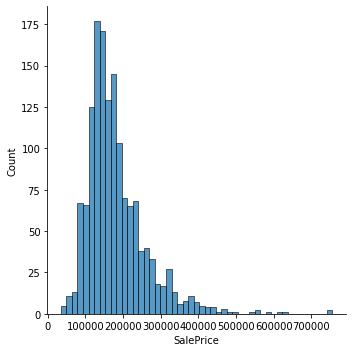

In [117]:
# # check for target distribution
ax = sns.displot(y_train)
plt.show()

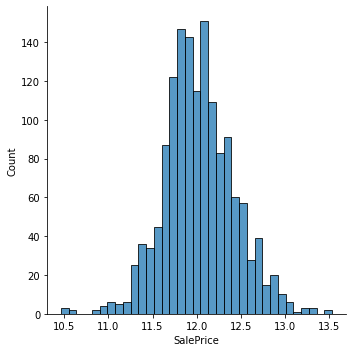

In [118]:
# use log-transform to make it normally distributed
y_train = np.log(y_train)

ax = sns.displot(y_train)
plt.show()

## Correlation Matrix

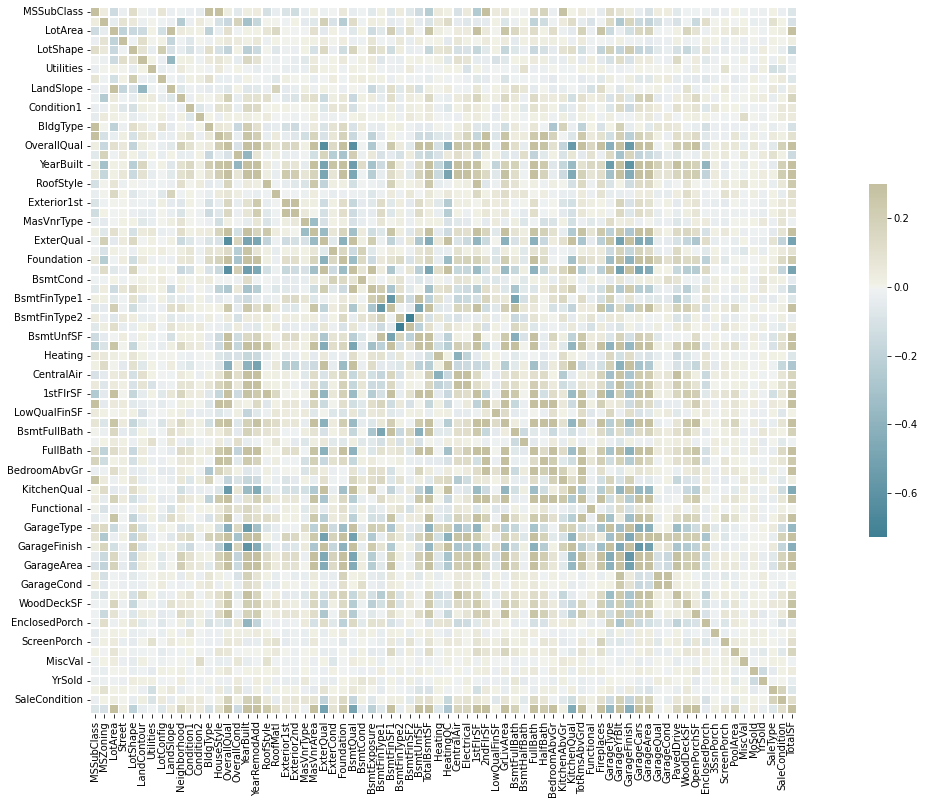

In [119]:

# train and test
X_train = X_matrix.iloc[:train.shape[0], :]
X_test = X_matrix.iloc[train.shape[0]:, :]

corr = X_train.corr()

# visualize correlation matrix
fig, ax = plt.subplots(figsize=(26, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 80, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={'shrink': 0.5})

plt.show()

## Feature Selecting

In [120]:
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(X_train, y_train)
ranking = np.argsort(-rf.feature_importances_)

plt.figure(figsize=(30, 12))
fig = px.bar(x=rf.feature_importances_[ranking], y=X_train.columns.values[ranking], orientation='h')
fig.update_layout(title='Feature Importance',
                  xaxis_title="Ranking",
                  yaxis_title="Columns",)
fig.show()

<Figure size 2160x864 with 0 Axes>

There are 2 dominant features: 'OverallQual' and 'TotalSF'. I'm not going to use all 77 features. Instead, I'll take top 30.
Also I'll add new column called "Synergy" which is simply the multiplication between the top 2 features.


In [121]:
# pick only top 30 features
X_train = X_train.iloc[:, ranking[:30]]
X_test = X_test.iloc[:, ranking[:30]]


In [122]:
# synergy between 'OverallQual' and 'TotalSF'
X_train['Synergy'] = X_train['OverallQual']*X_train['TotalSF']
X_test['Synergy'] = X_test['OverallQual']*X_test['TotalSF']

Normalize the data via z-scoring.

In [123]:
#z-scoring
X_train = (X_train - X_train.mean())/X_train.std()
X_test = (X_test - X_test.mean())/X_test.std()

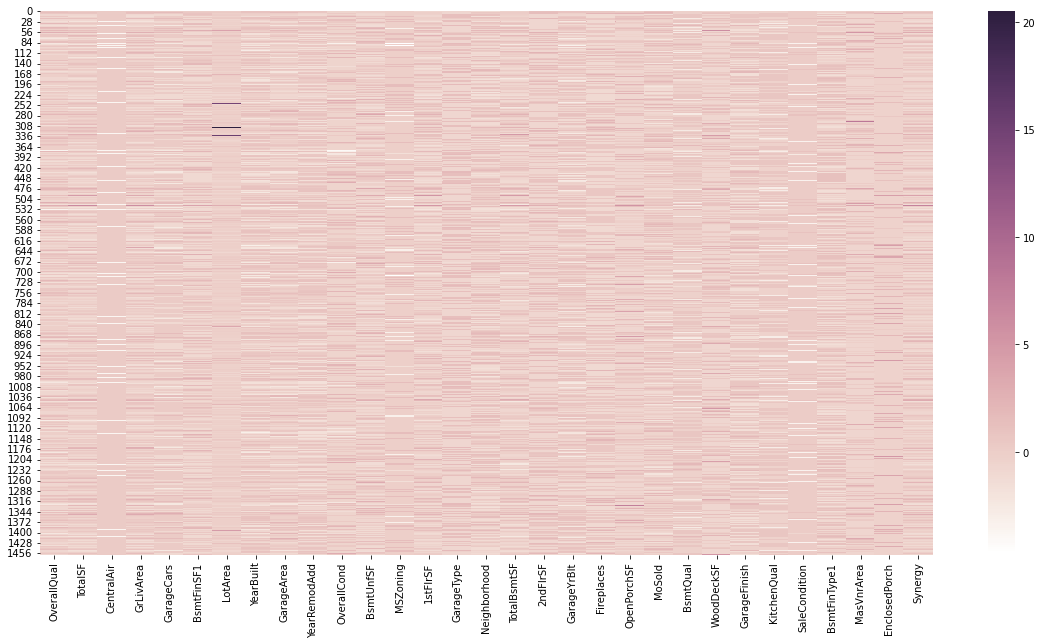

In [124]:
fig, ax = plt.subplots(figsize=(20, 10))

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.heatmap(X_train, cmap=cmap)

plt.show()

Relationship of features with 'SalePrice'.

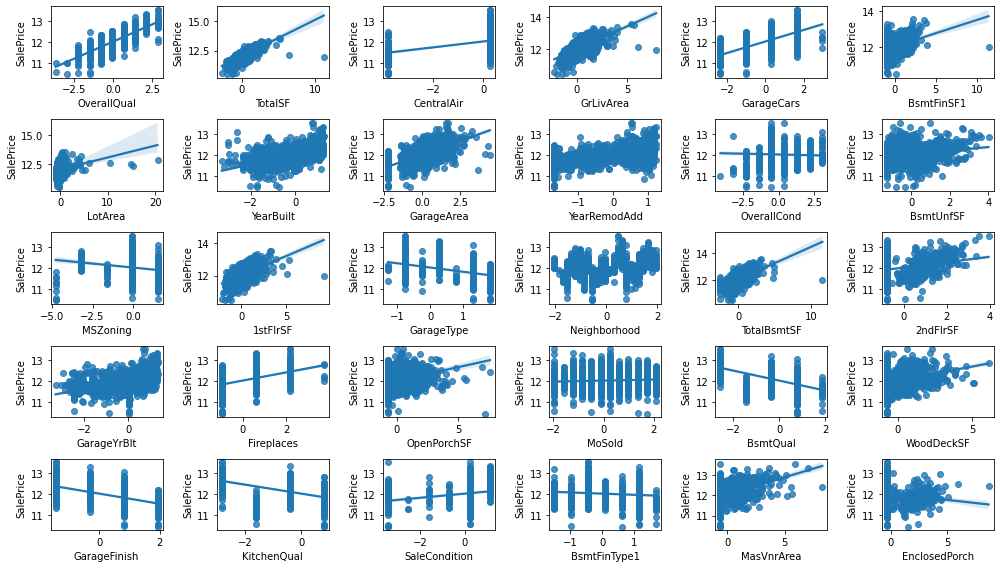

In [125]:
fig = plt.figure(figsize=(14, 8))

for i in np.arange(30):
    ax = fig.add_subplot(5, 6, i+1)
    sns.regplot(x=X_train.iloc[:, i], y=y_train)
    
plt.tight_layout()
plt.show()

There seems to be a few outliers in 'TotalSF' and 'GrLivArea'.

In [126]:
X_matrix = X_train

X_matrix['SalePrice'] = y_train

X_matrix = X_matrix.drop(X_matrix[(X_matrix['TotalSF']>5) & (X_matrix['SalePrice']<12.5)].index)
X_matrix = X_matrix.drop(X_matrix[(X_matrix['GrLivArea']>5) & (X_matrix['SalePrice']<13)].index)

y_train = X_matrix['SalePrice']
X_train = X_matrix.drop(['SalePrice'], axis=1)

## **Prediction with XGBoost**

In [127]:
print("Parameter optimization")

xgb_model = xgb.XGBRegressor(random_state=42, silent=True)
reg_xgb = GridSearchCV(xgb_model,
                   {'max_depth': [2,4,6],
                    'n_estimators': [50,100,200]}, verbose=1)

reg_xgb.fit(X_train, y_train)

print(reg_xgb.best_score_)
print(reg_xgb.best_params_)

Parameter optimization
Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.9049447800980512
{'max_depth': 2, 'n_estimators': 200}


## **Prediction with SVR**

In [128]:
reg_svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})
reg_svr.fit(X_train, y_train)

print(reg_svr.best_score_)
print(reg_svr.best_params_)

0.9052483422252717
{'C': 1.0, 'gamma': 0.01}


In [129]:
# second feature matrix
X_train2 = pd.DataFrame( {'XGB': reg_xgb.predict(X_train),
                         'SVR': reg_svr.predict(X_train),})

X_train2.head()

,XGB,SVR
0,12.216480,12.209093
1,12.125464,12.151434
2,12.250143,12.270565
3,11.942528,11.949170
4,12.591046,12.558129


In [130]:
reg = linear_model.LinearRegression()
reg.fit(X_train2, y_train)

# prediction using the test set
X_test2 = pd.DataFrame( {'XGB': reg_xgb.predict(X_test),
                         'SVR': reg_svr.predict(X_test),})

# convert the prediction back to non-log scale
y_pred = np.exp(reg.predict(X_test2))

Submit the predictions.

In [131]:
# submission
submission = pd.DataFrame({
    "Id": test_ID,
    "SalePrice": y_pred
})

In [132]:
submission.head()

,Id,SalePrice
0,1461,126763.544154
1,1462,169237.766726
2,1463,176749.583190
3,1464,195531.799843
4,1465,189716.042266


In [133]:
submission.to_csv('/content/drive/MyDrive/Prediction/houseprice_predictions.csv', index=False)